In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')
import seaborn as sns

In [24]:
from requests import Request, Session
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' #url where we are pulling our data

# we want first 100 crypto currencies, hence start 1 to 100
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
#contains api key and the format of file we want.
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ea7c0e77-6925-4822-9c95-4f1592d63564',
}
#using the request library to pass in the arguments
response = requests.get(url, params=parameters,headers=headers) 

data= response.json()

### We can see printing out the data its in a nested json format

In [36]:
print(data)

{'status': {'timestamp': '2021-05-06T14:41:15.685Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 4990}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9512, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channels', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'arrington-xrp-capital', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures', 'galaxy-digital-portfolio', 'huobi-capital', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-

In [30]:
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df


In [56]:
coins = data.copy()

In [57]:
coins.keys() #We can see there are two keys, we want values in the data keys

dict_keys(['status', 'data'])

In [227]:
df = pd.DataFrame(coins['data'])
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,last_updated,quote
0,1,Bitcoin,BTC,bitcoin,9512,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.870142e+07,1.870142e+07,None,1,2021-05-06T14:40:02.000Z,"{'USD': {'price': 57299.3144244728, 'volume_24..."
1,1027,Ethereum,ETH,ethereum,6360,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum, coi...",NaN,1.157632e+08,1.157632e+08,None,2,2021-05-06T14:40:02.000Z,"{'USD': {'price': 3495.9838167126204, 'volume_..."
2,1839,Binance Coin,BNB,binance-coin,587,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.705328e+08,1.534329e+08,1.694329e+08,None,3,2021-05-06T14:39:16.000Z,"{'USD': {'price': 643.1489166772213, 'volume_2..."
3,74,Dogecoin,DOGE,dogecoin,351,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.294891e+11,1.294891e+11,None,4,2021-05-06T14:40:03.000Z,"{'USD': {'price': 0.60607203920783, 'volume_24..."
4,52,XRP,XRP,xrp,671,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.540403e+10,9.999083e+10,None,5,2021-05-06T14:40:03.000Z,"{'USD': {'price': 1.69548597346029, 'volume_24..."


## We still have a lot of nested data
We shall explore quote columnn as that looks like it contains useful information

In [229]:
df.quote[0] #interestingly most of our info is in this nested format

{'USD': {'price': 57299.3144244728,
  'volume_24h': 67215621974.841675,
  'percent_change_1h': -0.11098611,
  'percent_change_24h': 2.23827181,
  'percent_change_7d': 6.6729323,
  'percent_change_30d': -1.12142409,
  'percent_change_60d': 13.62011406,
  'percent_change_90d': 50.56013074,
  'market_cap': 1071578831260.6963,
  'last_updated': '2021-05-06T14:40:02.000Z'}}

## We will use json_normalize package to unpack the nested data

In [70]:
df_norm =  pd.json_normalize(coins['data'], sep ='_')

Exploring the dataset, it seems there are a lot of columns we wont require, lets just get rid of those

In [71]:
df_norm.head()


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote_USD_percent_change_30d,quote_USD_percent_change_60d,quote_USD_percent_change_90d,quote_USD_market_cap,quote_USD_last_updated,platform_id,platform_name,platform_symbol,platform_slug,platform_token_address
0,1,Bitcoin,BTC,bitcoin,9512,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.870142e+07,1.870142e+07,...,-1.121424,13.620114,50.560131,1.071579e+12,2021-05-06T14:40:02.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6360,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum, coi...",NaN,1.157632e+08,1.157632e+08,...,67.960572,112.355666,102.511799,4.047062e+11,2021-05-06T14:40:02.000Z,NaN,NaN,NaN,NaN,NaN
2,1839,Binance Coin,BNB,binance-coin,587,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.705328e+08,1.534329e+08,1.694329e+08,...,65.548351,171.860093,981.382700,9.868020e+10,2021-05-06T14:39:16.000Z,NaN,NaN,NaN,NaN,NaN
3,74,Dogecoin,DOGE,dogecoin,351,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.294891e+11,1.294891e+11,...,885.834224,1092.349059,1195.232208,7.847973e+10,2021-05-06T14:40:03.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,671,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.540403e+10,9.999083e+10,...,77.890171,267.133257,281.048514,7.698189e+10,2021-05-06T14:40:03.000Z,NaN,NaN,NaN,NaN,NaN


In [77]:
col_drop = ['id','slug','cmc_rank','quote_USD_last_updated',
            'quote_USD_percent_change_30d','quote_USD_percent_change_60d',
            'tags','platform_id','platform_name',
            'platform_slug','platform_token_address',
            'platform','platform_symbol'
            ]

In [78]:
df_norm.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'platform',
       'cmc_rank', 'last_updated', 'quote_USD_price', 'quote_USD_volume_24h',
       'quote_USD_percent_change_1h', 'quote_USD_percent_change_24h',
       'quote_USD_percent_change_7d', 'quote_USD_percent_change_30d',
       'quote_USD_percent_change_60d', 'quote_USD_percent_change_90d',
       'quote_USD_market_cap', 'quote_USD_last_updated', 'platform_id',
       'platform_name', 'platform_symbol', 'platform_slug',
       'platform_token_address'],
      dtype='object')

In [80]:
df_norm = df_norm.drop(columns=col_drop)

In [84]:
df_norm.head()

,name,symbol,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,last_updated,quote_USD_price,quote_USD_volume_24h,quote_USD_percent_change_1h,quote_USD_percent_change_24h,quote_USD_percent_change_7d,quote_USD_percent_change_90d,quote_USD_market_cap
0,Bitcoin,BTC,9512,2013-04-28T00:00:00.000Z,2.100000e+07,1.870142e+07,1.870142e+07,2021-05-06T14:40:02.000Z,57299.314424,6.721562e+10,-0.110986,2.238272,6.672932,50.560131,1.071579e+12
1,Ethereum,ETH,6360,2015-08-07T00:00:00.000Z,NaN,1.157632e+08,1.157632e+08,2021-05-06T14:40:02.000Z,3495.983817,4.324182e+10,0.622693,5.197076,26.223644,102.511799,4.047062e+11
2,Binance Coin,BNB,587,2017-07-25T00:00:00.000Z,1.705328e+08,1.534329e+08,1.694329e+08,2021-05-06T14:39:16.000Z,643.148917,3.748004e+09,0.172037,-0.761977,7.593960,981.382700,9.868020e+10
3,Dogecoin,DOGE,351,2013-12-15T00:00:00.000Z,NaN,1.294891e+11,1.294891e+11,2021-05-06T14:40:03.000Z,0.606072,2.840280e+10,2.023303,-6.998869,97.179044,1195.232208,7.847973e+10
4,XRP,XRP,671,2013-08-04T00:00:00.000Z,1.000000e+11,4.540403e+10,9.999083e+10,2021-05-06T14:40:03.000Z,1.695486,1.545486e+10,3.088156,9.450560,22.061392,281.048514,7.698189e+10


### Okay! Now that we have the data cleaned and formatted, Time to do some analysis
### So firstly we know Bitcoin is the king but how big is Bitcoin compared with the rest of the cryptocurrencies?

A lot of new projects have surfaced over the last couple of years, however Bitcoin is still the biggest in terms of market cap, Lets check out the top
10 coins.

In [136]:
# Our dataset is already arranged in market cap magnitude 
top10cap= top10cap.iloc[0:10]

### Wow, Bitcoin and Ethereum are still top 2 coins, but interestingly dogecoin! is now the 4th highest
### Bitcoin is just shy over 1 Trillion dollars in Market Cap!

In [234]:
top10cap[['name','quote_USD_market_cap']]

,name,quote_USD_market_cap
0,Bitcoin,1.071579e+12
1,Ethereum,4.047062e+11
2,Binance Coin,9.868020e+10
3,Dogecoin,7.847973e+10
4,XRP,7.698189e+10
5,Tether,5.356385e+10
6,Cardano,5.169191e+10
7,Polkadot,3.829094e+10
8,Bitcoin Cash,2.640813e+10
9,Litecoin,2.304731e+10


## Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.

In [105]:
top10cap = top10cap.assign(market_cap_perc = lambda x:(x.quote_USD_market_cap/df_norm.quote_USD_market_cap.sum())*100)

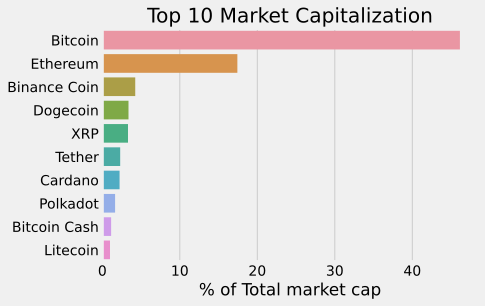

In [143]:
ax =sns.barplot(x='market_cap_perc',y='name',data=top10cap)
plt.title('Top 10 Market Capitalization')
plt.xlabel('% of Total market cap')
plt.ylabel('')
plt.show()



We can see that Bitcoin has well over 40% of market cap, but we can't really see a clear picture of the 
other coins. Lets scale to see them.

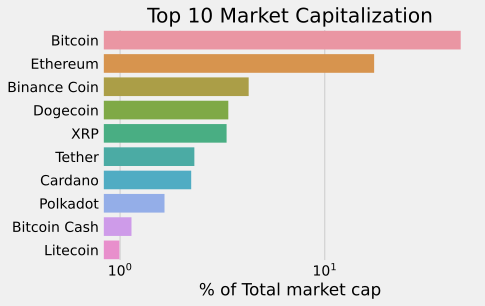

In [241]:
ax =sns.barplot(x='market_cap_perc',y='name',data=top10cap)
plt.title('Top 10 Market Capitalization')
plt.xlabel('% of Total market cap')
plt.ylabel('')
ax.set_xscale('log')
plt.show()


### The Crypto  Market is extremely volatile, prices go up and down in seconds.
## There are potential for huge gains and huge losses, so everyone should always be cautious.

Ok Now we will see the how much the value has changed in the last 7 days as well as in the last 90 days

In [154]:
volatility = df_norm[['name', 'quote_USD_percent_change_7d','quote_USD_percent_change_90d']]
volatility = volatility.sort_values('quote_USD_percent_change_7d',ascending=False)
volatility.head()

,name,quote_USD_percent_change_7d,quote_USD_percent_change_90d
63,Telcoin,475.417794,2076.321703
15,Ethereum Classic,229.317295,1302.801968
61,OKB,100.195710,466.006953
3,Dogecoin,97.179044,1195.232208
45,Waves,91.520003,348.665735


 Alright WOW! TELCOIN has 475% gain in the last 7 days

### Lets check out top 10 winners and losers in the last 7 days in a Bar Chart

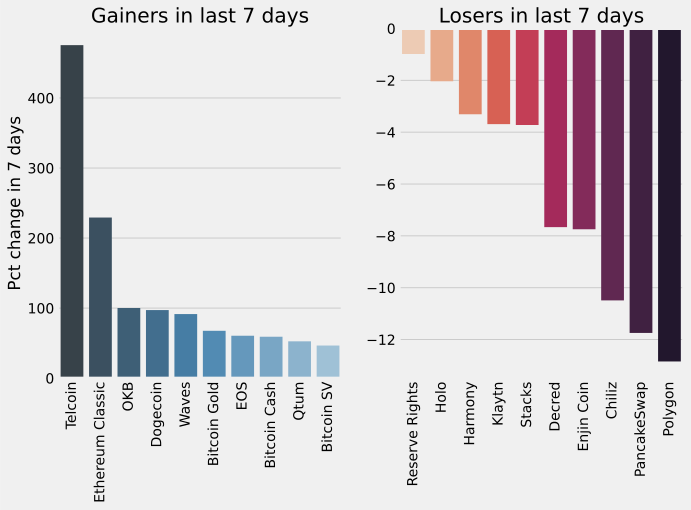

In [220]:
fig, ax = plt.subplots(nrows =1, ncols=2, figsize=(10, 6))
ax[0] =sns.barplot(x='name',y='quote_USD_percent_change_7d',
                data=volatility[:10],palette= 'dark', ax =ax[0])

ax[1] = sns.barplot(x='name',y='quote_USD_percent_change_7d',data=volatility[-10:],palette ='rocket_r', ax=ax[1])

ax[0].set_ylabel('Pct change in 7 days')
ax[0].set_xlabel('')
ax[0].set_title('Gainers in last 7 days')
ax[0].tick_params(axis='x', rotation=90)

ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_title('Losers in last 7 days')
ax[1].tick_params(axis='x', rotation=90)

plt.show()

### Similarly lets check out top 5 winners and losers in the last 90 days.

In [221]:
volatility = df_norm[['name', 'quote_USD_percent_change_7d','quote_USD_percent_change_90d']]
volatility = volatility.sort_values('quote_USD_percent_change_90d',ascending=False)
volatility.head()

,name,quote_USD_percent_change_7d,quote_USD_percent_change_90d
96,BakeryToken,23.095484,4495.962784
63,Telcoin,475.417794,2076.321703
51,Chiliz,-10.490116,2017.289785
55,Holo,-2.035500,1779.462171
34,BitTorrent,14.361519,1644.293691


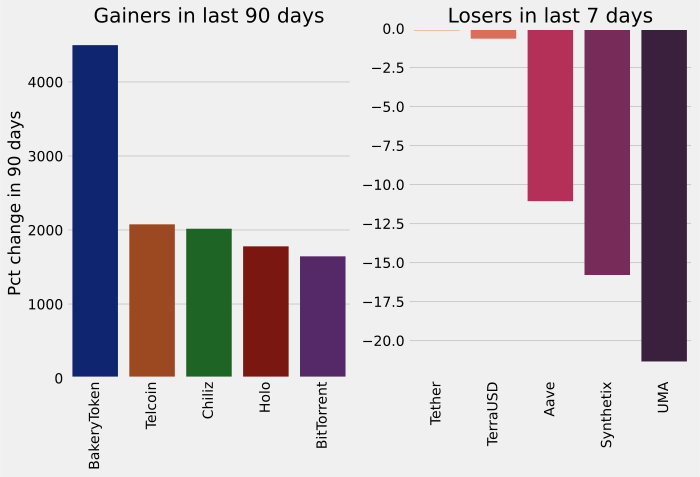

In [225]:
volatility = df_norm[['name', 'quote_USD_percent_change_7d','quote_USD_percent_change_90d']]
volatility = volatility.sort_values('quote_USD_percent_change_90d',ascending=False)
volatility.head()


fig, ax = plt.subplots(nrows =1, ncols=2, figsize=(10, 6))
ax[0] =sns.barplot(x='name',y='quote_USD_percent_change_90d',
                data=volatility[:5],palette= 'dark', ax =ax[0])

ax[1] = sns.barplot(x='name',y='quote_USD_percent_change_90d',data=volatility[-5:],palette ='rocket_r', ax=ax[1])

ax[0].set_ylabel('Pct change in 90 days')
ax[0].set_xlabel('')
ax[0].set_title('Gainers in last 90 days')
ax[0].tick_params(axis='x', rotation=90)

ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_title('Losers in last 7 days')
ax[1].tick_params(axis='x', rotation=90)

plt.show()

## BakeryToken has increased by 4000% That is astonishing!  While UMA has -20% moderate depreciation over the last 90 days!
